In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib  inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\mlproject\notebook\data\student.csv')


In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

Checking Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Checking gor duplicate values

In [7]:
df.duplicated().sum()

0

Checking for datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From above code we can observe that:
mean value are very closed to each other bwt 66 and 68
standard deviation bwt 14.6 to 15.19


Exploring data

In [11]:
print("categories in 'gender' variables:   ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variables:   ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variables:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variables:   ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variables:   ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variables:    ['female' 'male']
categories in 'race_ethnicity' variables:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variables:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variables:    ['standard' 'free/reduced']
categories in 'test preparation course' variables:    ['none' 'completed']


In [12]:
#defining numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'o']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'o']

#print columns
print('we have {} numeric features : {}'.format(len(numeric_features),numeric_features))
print('\nwe have {} categorical feature : {}'.format(len(categorical_features),categorical_features))

we have 8 numeric features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score']

we have 0 categorical feature : []


Adding column for "Total Score" and "Average"

In [13]:
df['total score']=df['math_score']+ df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'number of students with full marks in maths:{math_full}')
print(f'number of students with full marks in writing:{writing_full}')
print(f'number of students with full marks in reading:{reading_full}')

number of students with full marks in maths:7
number of students with full marks in writing:14
number of students with full marks in reading:17


In [15]:
reading_less = df[df['reading_score']<=20]['average'].count()
writing_less = df[df['writing_score']<=20]['average'].count()
math_less= df[df['math_score']<=20]['average'].count()

print(f'number of students with full marks in maths:{math_less}')
print(f'number of students with full marks in writing:{writing_less}')
print(f'number of students with full marks in reading:{reading_less}')

number of students with full marks in maths:4
number of students with full marks in writing:3
number of students with full marks in reading:1


From above value we get students have performed the worsts in maths best in reading section

Exploring data visulization

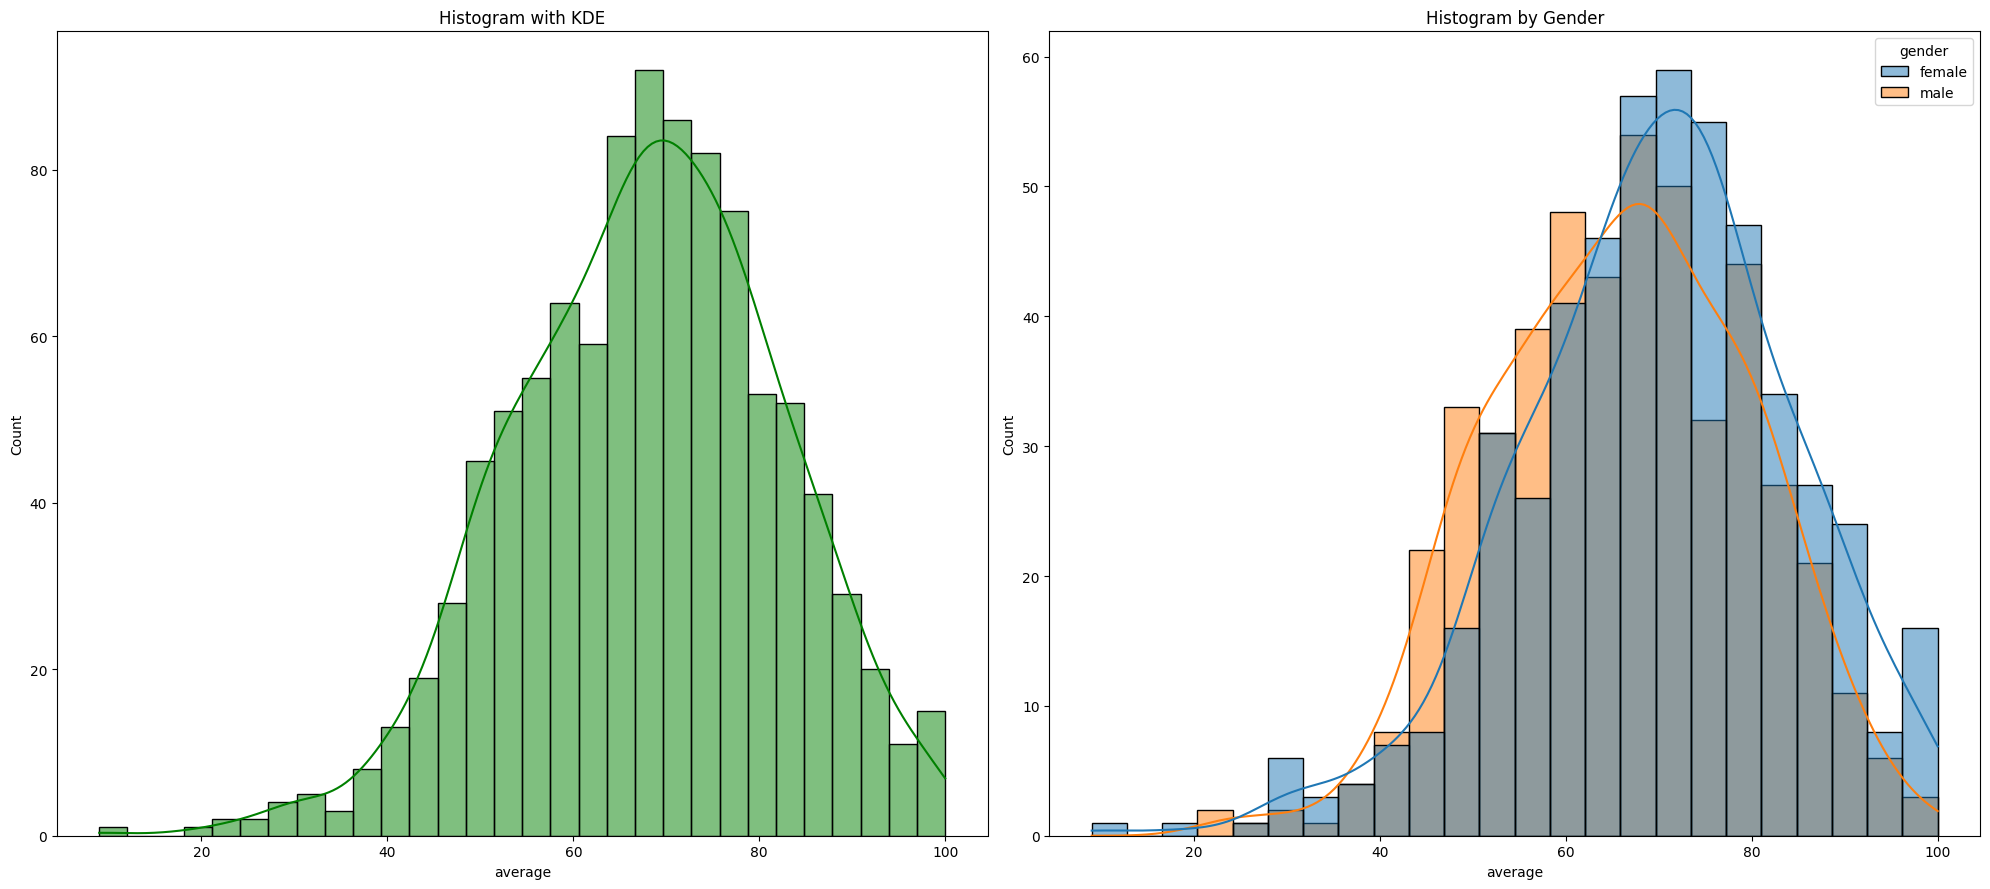

In [16]:
#Histogram and KDE plot
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 9))

sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Histogram with KDE")

sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram by Gender")

plt.tight_layout()
plt.show()


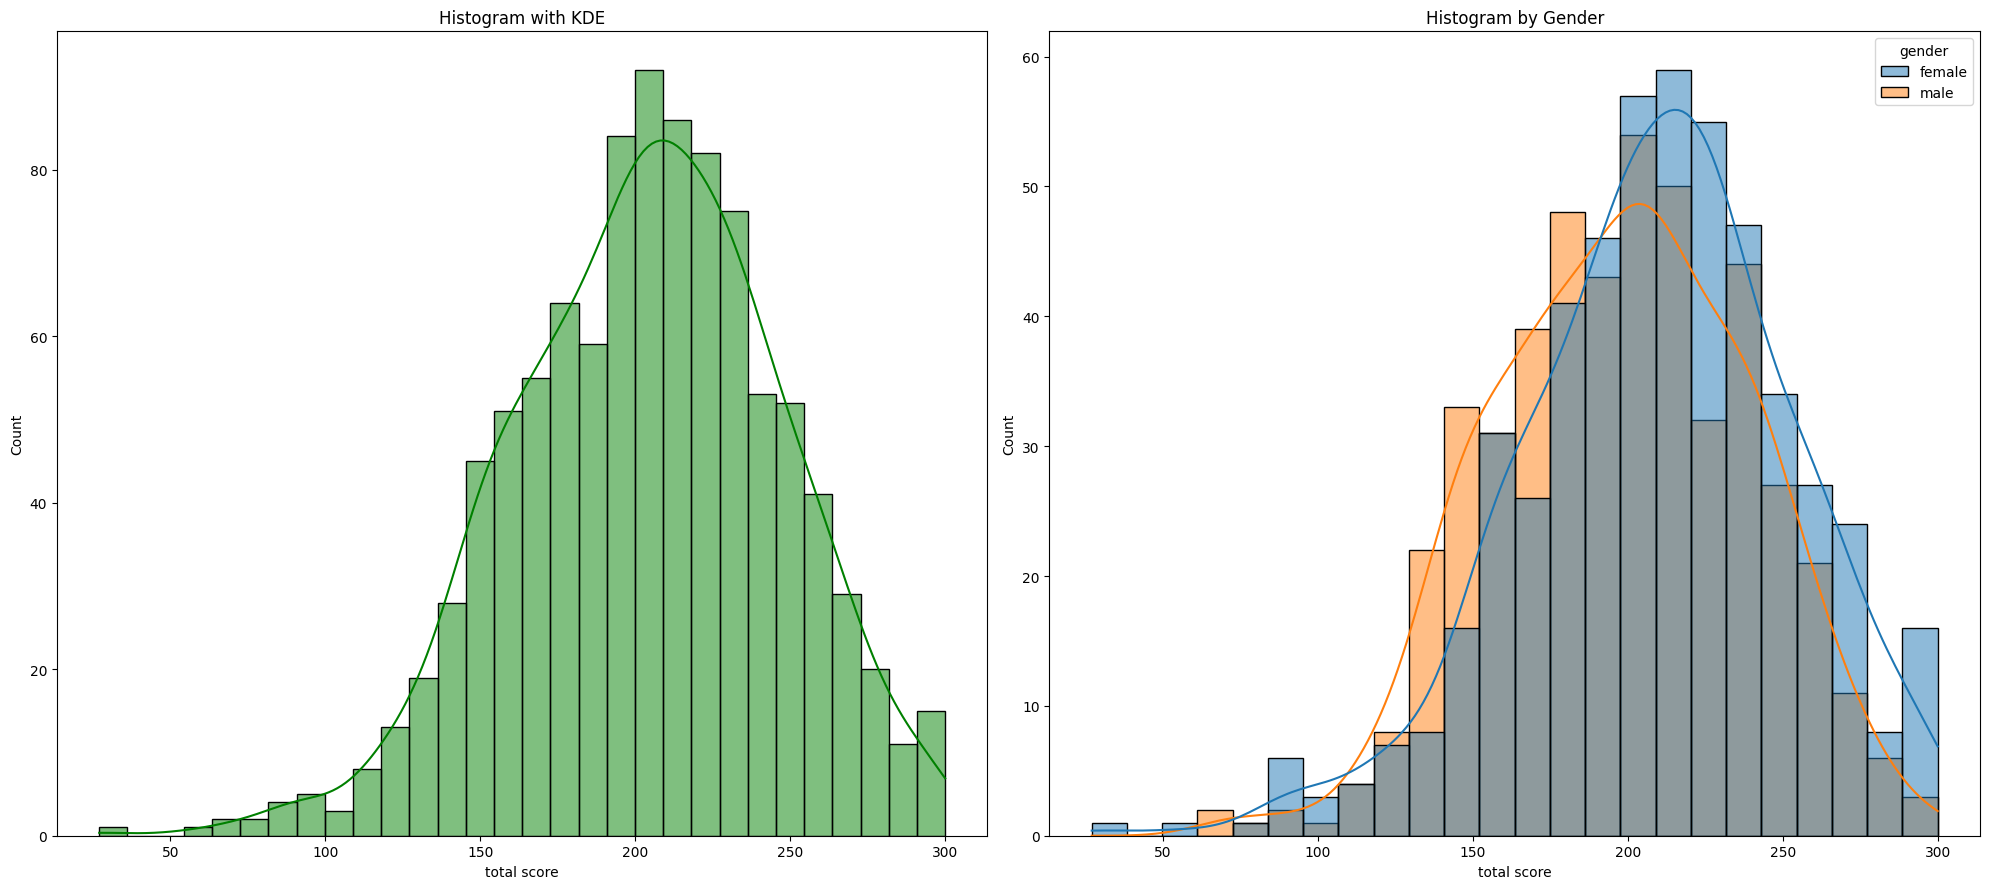

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

sns.histplot(data=df, x='total score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Histogram with KDE")

sns.histplot(data=df, x='total score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Histogram by Gender")

plt.tight_layout()
plt.show()

Insights:
standard lunch helps perform well in exam
standard lunch helps perform well in exam be it a male or a female

<Axes: xlabel='average', ylabel='Count'>

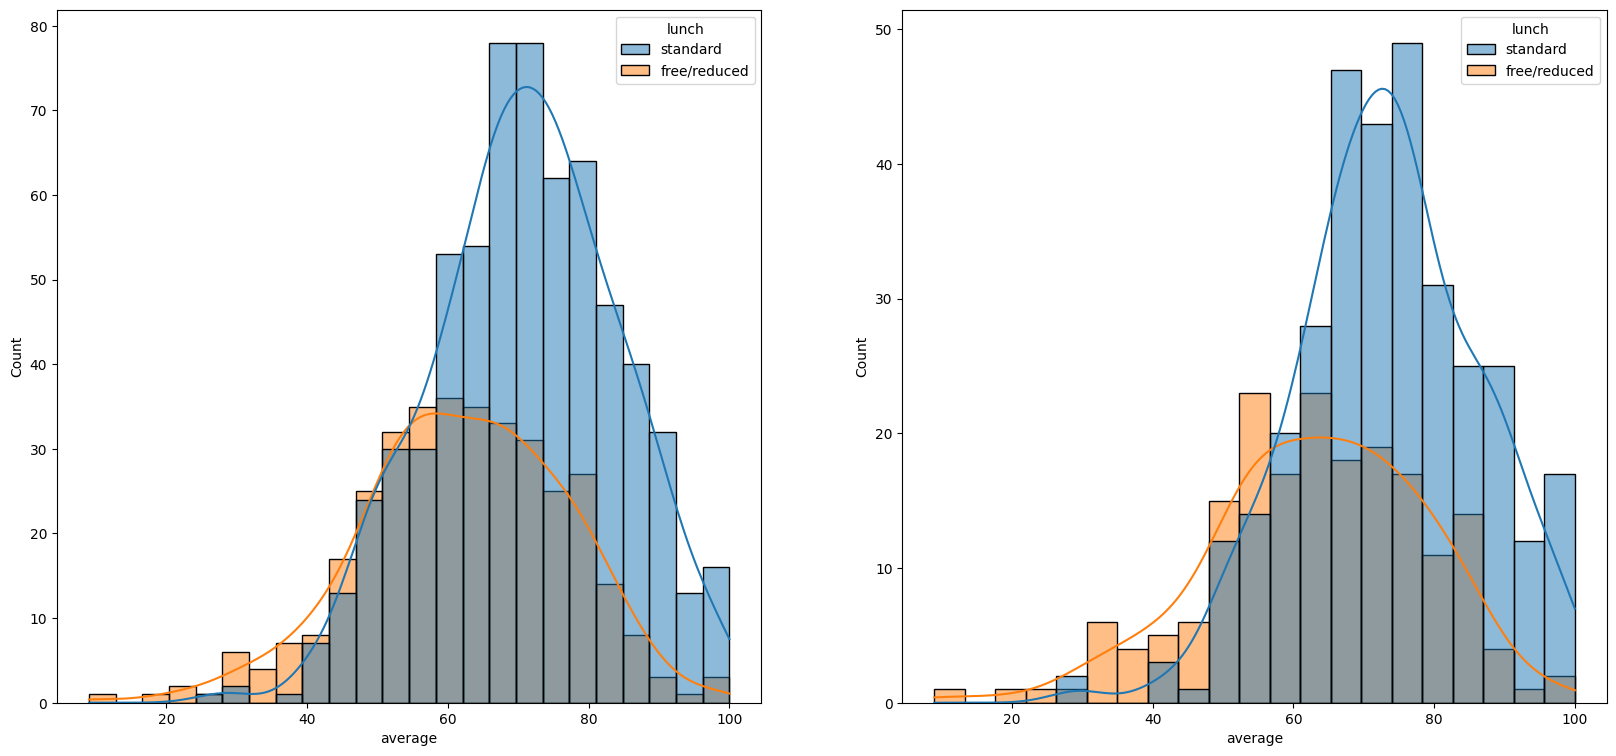

In [19]:
fig,axs = plt.subplots(1,2, figsize=(20,9))

sns.histplot(data=df,x='average',kde=True,hue='lunch',ax=axs[0])

sns.histplot(data =df[df.gender=='female'],x='average',kde=True,hue='lunch',ax=axs[1])


Text(0.5, 1.0, 'female')

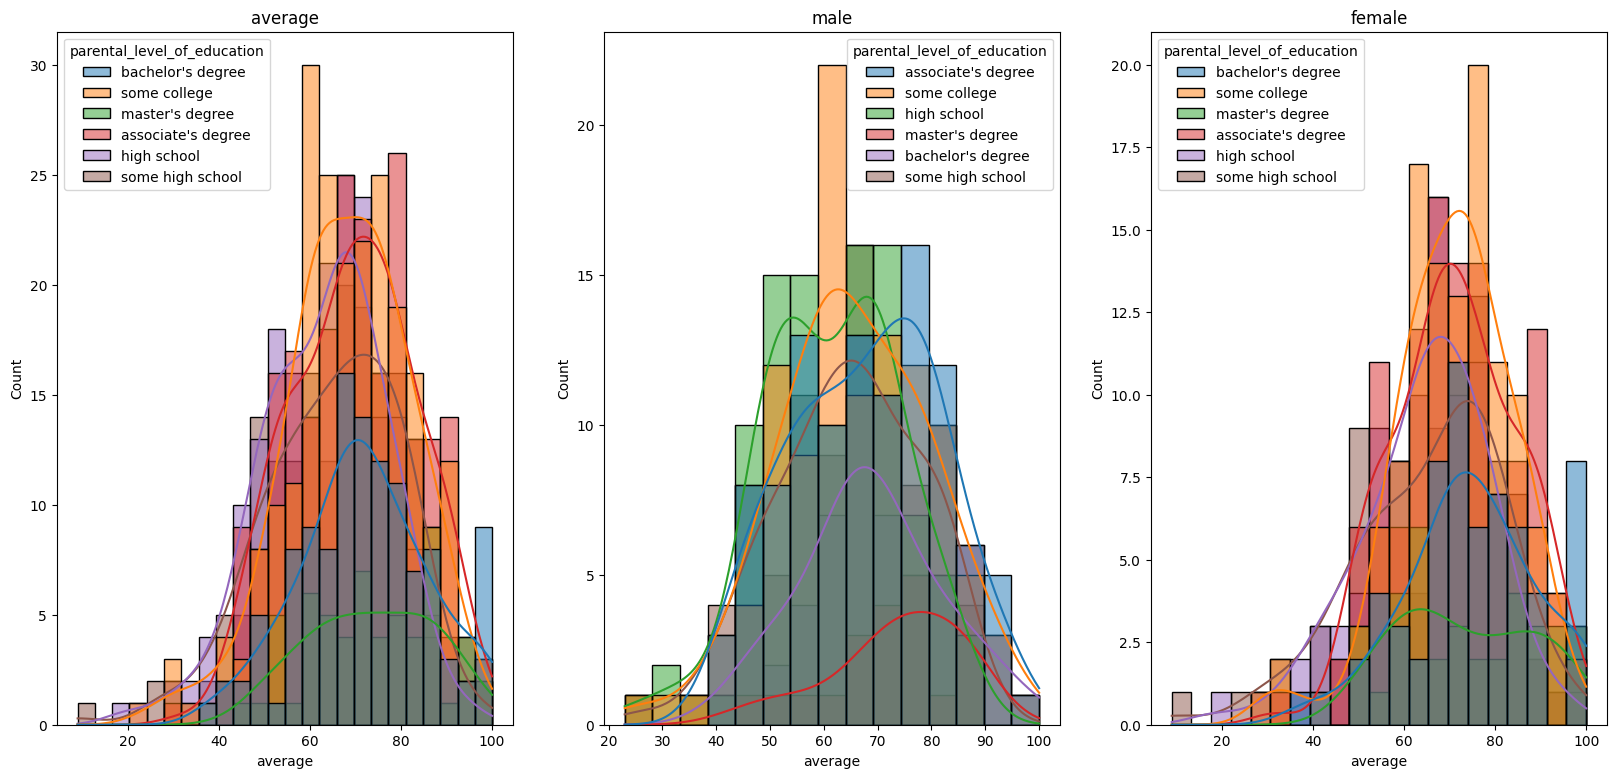

In [30]:
fig,axs =plt.subplots(1,3,figsize=(20,9))
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education',ax=axs[0])
axs[0].set_title('average')
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education',ax=axs[1])
axs[1].set_title('male')
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
axs[2].set_title('female')

Insights:
*in general parent's education don't help student perform well in exam
*2nd plot shows that parent's whose education is of associate's degree or master degree their male child tend to perform well in exam
*3rd plot we can see there is no effect of parent's education on female students

(-1.25, 1.25, -1.25, 1.25)

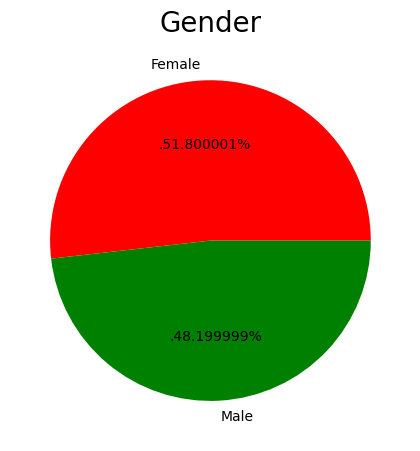

In [52]:

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')


Inights:
number of male and female student is almost equal 

(-1.25, 1.25, -1.25, 1.25)

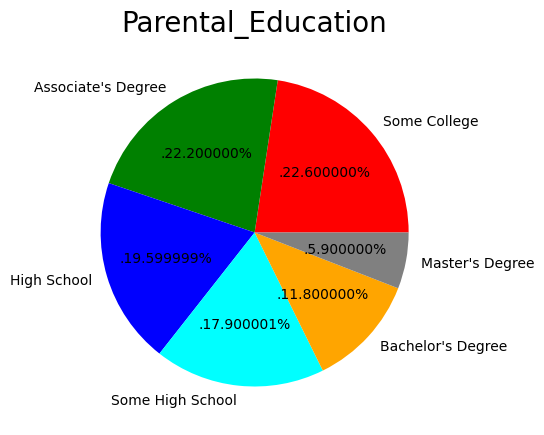

In [65]:
fig,axs=plt.subplots(1,1,figsize=(5,5))
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


Insights:
number of students whose parental education is "some college" is greater followed closely by 'associate's degree'

<Axes: xlabel='lunch', ylabel='writing_score'>

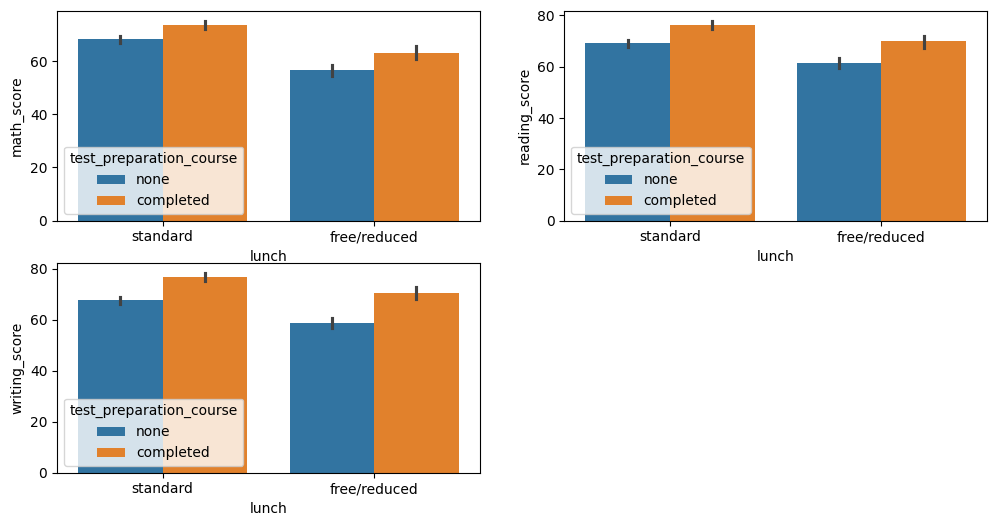

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

insights:
*students who have completed the test prepartion course have scores higher in all three categories than those who haven't completed course